# Project: What Twitter users tweet about

## Introduction

The purpose of this project is to analyse the "interest" that users of the Twitter social network show towards events happening around the globe. The analysis seeks to "connect" tweets from Switzerland and all over the world with categories of events and specific events, based on a number of variables, e.g. the coverage of the event (how many people were interested or expressed an opinion about it on Twitter), how much Twitter users keep tweeting about an event in the following months after an event etc. With the general belief being that the social network world focuses more on less significant events than more significant ones, we would like to compare and contrast users' interest in serious vs. less serious events and draw conclusions about the population's behaviour.

In order to do so, we are going to use the dataset of Swiss tweets and the Twitter-leon dataset of global tweets. Both datasets offer a number of columns that can be exploited in the contexts of this analysis, as we will see below. Before we begin the analysis, however, it is important to define its premises and its limitations, either defined by us or imposed by the datasets themselves.

More specifically, we need to define the following premises, in the context of our analysis:

1. Which __types of events__ we are going to deal with. An event could be anything, from a festival to a scientific discovery, or even a terrorist attack. Therefore it is important that we define the bigger __categories__ of events that we are going to examine, with regard to their "appearances" in the Twitter dataset, as well as the __specific events__ that we could extract from the dataset, that can be sorted under these bigger categories.

2. In order to determine if Twitter users are "__interested__" in an event, we need to define a few __metrics__ that we will use. Some of these metrics could be the total number of tweets that refer to an event (by either using specific hasthags or by containing specific keywords that we will define), the number of retweets to a tweet that refers to a specific event, the number of days after an event that tweets referring to the event keep appearing, etc.

3. Finally, we need to define the __premises that are going to regulate our observations__. In other words, what kinds of comparisons we wish to make between the numbers (metrics) that we will retrieve from the two datasets and whether the comparisons are going to be performed between Swiss and international Twitter users, or separately for the two populations. 

From all the above, we can see that we first need to explore and analyse our dataset a little bit, in order to be able to answer these questions in a sufficient way, according to the possibilities and contraints imposed by the datasets, before we dive into the core part of the project.

## Part I: Determine the datasets' properties

### Chapter 1: Swiss tweets dataset

In this chapter, we will take a first look at the Swiss tweets dataset, in order to determine the dataset schema, the meaning of columns, the number of rows and all other information that we can retrieve from a first, superficial analysis. After running a few Python scripts __(all of which, you can find in our project's Github folder)__, we retrieved the following information about the dataset:

Note: Due to the cluster's very bad computational performance, we were forced to download the entirety of the Swiss tweets dataset and perform all calculations locally.

1) The dataset's columns are the following:

In [59]:
import os
import pandas as pd
import json

DATA_DIR = '.'

with open(os.path.join(DATA_DIR, 'sample.json')) as f:
    swiss = json.load(f)
    
column_list = list(swiss[0]['_source'].keys())
column_list.sort()    
for key in column_list :
    print(key)

author_avatar_img
author_gender
author_handle
author_link
author_name
author_user_id
bucket
canonical
date_found
domain
geo_location
geo_location_id
hashcode
index_method
lang
last_updated
links
main
main_authoritative
main_checksum
main_format
main_length
metadata_score
permalink
published
replied
resource
sentiment
sequence
sequence_range
site
source_content_checksum
source_content_length
source_created
source_date_found
source_description
source_favicon_height
source_favicon_width
source_favorites
source_followers
source_following
source_handle
source_hashcode
source_http_status
source_image_height
source_image_src
source_image_width
source_last_posted
source_last_published
source_last_updated
source_likes
source_link
source_location
source_parsed_posts
source_parsed_posts_max
source_profiles
source_publisher_subtype
source_publisher_type
source_resource
source_setting_author_policy
source_setting_index_strategy
source_setting_minimum_content_metadata_score
source_setting_update_str

For the purposes of this analysis, however, we chose to keep only the following columns, which we considered helpful:

1. __lang__  (Tweet's language)
2. __published__ (Date of the tweet's publications)
2. __source_location__ (User's location)
4. __main__ (Tweet text)
5. __tags__ (Tags)
6. __sentiment__ (Sentiment caused from tweet)

2) The total number of rows in the dataset is 10,828,070.

3) The dataset contains tweets written in more than 58 different languages. For the most common languages (english, french, german and italian) we observe the following distribution of tweets per language:

In [98]:
tweets_per_lang_swiss = pd.read_csv(os.path.join(DATA_DIR, 'tweets_by_lang_swiss.csv'), 
                                    delimiter=",",
                                    index_col = None,
                                    names = ['language', 'count'])

tweets_per_lang_swiss = tweets_per_lang_swiss[(tweets_per_lang_swiss['language'] == 'en')
                                             | (tweets_per_lang_swiss['language'] == 'fr')
                                             | (tweets_per_lang_swiss['language'] == 'de')
                                             | (tweets_per_lang_swiss['language'] == 'it')]

tweets_per_lang_swiss = tweets_per_lang_swiss.set_index('language')

tweets_per_lang_swiss

,count
language,
de,2205374
en,4434459
fr,2079918
it,235533


We visualise the distributions of these languages in the dataset with the following pie chart:

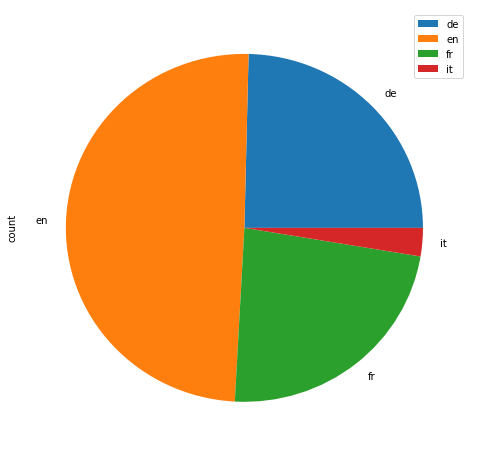

In [101]:
import matplotlib.pyplot as plt

plt.figure()
tweets_per_lang_swiss.plot(kind='pie', subplots=True, figsize=(8,8))
plt.show()

4) The dataset contains tweets from 01-01-2016 up until 31-10-2016.

5) We now group the tweets by user location:

In [107]:
tweets_per_region_swiss = pd.read_csv(os.path.join(DATA_DIR, 'tweets_by_region_swiss.csv'),
                               delimiter=",",
                               index_col = None,
                               names = ['region', 'count'])


tweets_per_region_swiss.head(10)

,region,count
0,NaN,239088
1,Svizzera,21695
2,Suisse,693562
3,Switzerland but Id say usa,218
4,Lugano - Lake Como,69
5,Switzerland/Slovakia,205
6,Suisse romande,50
7,قطر | Doha,94
8,Germany,509
9,Por ser como soy ;,66


Unfortunately, by just visually observing the contents of this column (here we only print the 10 first rows), we can tell that they seem entirely unreliable. They can contain any value, since they seem to correspond to a free text input area in the Twitter app, where a user can type in whatever they want as their location. We believe that it is very doubtful that we could properly clean and normalise the data of this column, therefore we decided that it would not be wise to use it in our analysis.

6) The distribution of tweets per sentiment is the following:

In [106]:
tweets_per_sentiment_swiss = pd.read_csv(os.path.join(DATA_DIR, 'tweets_per_sentiment_swiss.csv'),
                               delimiter=",",
                               index_col = None,
                               names = ['sentiment', 'count'])

tweets_per_sentiment_swiss = tweets_per_sentiment_swiss.set_index('sentiment')

tweets_per_sentiment_swiss.head(10)

,count
sentiment,
NaN,808445
NEGATIVE,692756
NEUTRAL,7726063
POSITIVE,1600806


We visualise this distribution with the following bar plot:

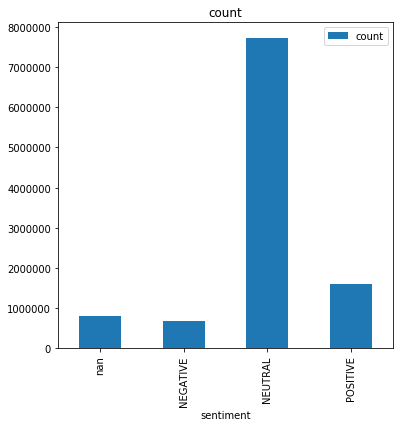

In [104]:
plt.figure()
tweets_per_sentiment_swiss.plot(kind='bar', subplots=True, figsize=(6,6))
plt.show()

As we can observe from the the bar plot above, the majority of tweets are characterised as "neutral". Nevertheless the amount of tweets with a "positive" or a "negative" attitude is not that low, with the "positive" tweets amounting to ~1.5 million and the "negative" tweets amounting to ~700,000. What we are looking forward to do here is to apply simple Natural Language Processing and Machine Learning techniques and attempt to categorise the "neutral" tweets as positive or negative, if possible. This analysis can also be performed on the global tweets dataset (leon), in more restricted subsets (e.g. to check whether the tweets correspoding to a given category demonstrate the expected sentiment).

### Chapter 2: Global tweets dataset

Let us now take a first glance at the global tweets dataset (tweets-leon), in the same way that we did in chapter 1:

1) The dataset's schema is the following:

In [34]:
global_tweets = pd.read_csv(os.path.join(DATA_DIR, 'head.csv'), 
                            delimiter='\t',
                            header = None,
                            names=['language', 'tweet_id', 'datetime', 'username', 'tweet_text'])
global_tweets.head(5)

,language,tweet_id,datetime,username,tweet_text
0,en,345963923251539968,Sat Jun 15 18:00:01 +0000 2013,Letataleta,RT @silsilfani: the world is not a wish-granti...
1,en,345963923297673217,Sat Jun 15 18:00:01 +0000 2013,JamesonN7,RT @WhosThisHoe: I'd rather sleep with a nice ...
2,en,345963923259924480,Sat Jun 15 18:00:01 +0000 2013,LauraEllynJones,Can't stand people who lie then blame it on so...
3,it,345963923276697601,Sat Jun 15 18:00:01 +0000 2013,ChialettaFClub,@ChialettaFClub: #rt seguimi ti seguo ti voto ...
4,fr,345963923255730176,Sat Jun 15 18:00:01 +0000 2013,_irem61_,RT @DHC_Music: Terrorism ... #FreePalestina ht...


The column headers are not included in the dataset, but it is easy to infer what each column could represent, just by looking at the first 5 rows. 

2) The total number of rows in the dataset is __~18 billion__. However, during our observation of the rows, we found that there are around 8 million rows with less than the 5 columns that are visible in the schema above. After looking into these problematic rows a bit further, we discovered that they can have any number of columns between 0 and 4. In addition, there are cases in which a single tweet can span to multiple rows, while containing no other column, apart from the tweet_text. However, these problematic rows could lead to counting the same tweet multiple times and obtaining unrealistic results. For this reason, we decided to remove them from our analysis, also considering that 8 million out of 18 billion total rows is a rather insignificant percentage (0.04%).

3) The dataset contains tweets written in 6 different languages, with the following distribution of tweets per language:

In [60]:
tweets_per_lang = pd.read_csv(os.path.join(DATA_DIR, 'tweets_per_language.csv'), 
                  delimiter=",",
                  index_col = 0)
tweets_per_lang

,count
language,
french,676529769
dutch,452780443
italian,466666820
german,452126737
english,12488903036
spanish,3439067021


We visualise this distributions with the following pie chart:

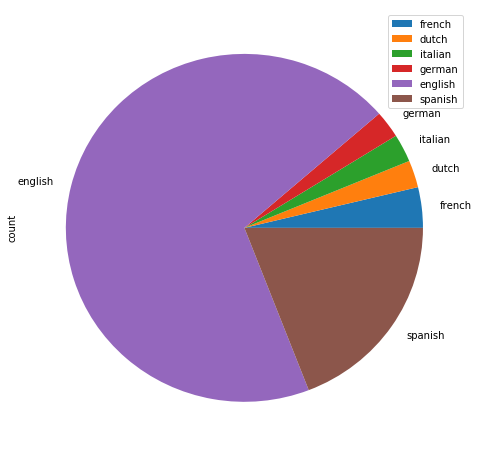

In [100]:
plt.figure()
tweets_per_lang.plot(kind='pie', subplots=True, figsize=(8,8))
plt.show()

By observing the above pie chart, we can conclude that more than 50% of the tweets in the dataset are written in English, while the second biggest percentage of tweets are written in Spanish. From this, one could possibly infer that most of the tweets may come from the American continent, where these two languages are widly spoken. However, we do not have any other sufficient pieces of information that can help us determine where the tweets have come from, therefore we will not make any assumptions. We will treat the users of this dataset simply as a "global" population, without any reference to specific countries or regions. 

4) The dataset contains tweets from 15-06-2013 up until 01-02-2016.

## Part II: Determining the event categories and specific events to be used

### Chapter 1: Event categories

Now, that we know a little bit more about our two datasets, we are going to describe the categories of events, as well as the specific events we would like to deal with and see if we can indeed find tweets concerning them. 

Let's first determine the event categories we would like to use. For now, we have come up with the following (not exhaustive) list of categories:

__1. Political events__ <br/>
__2. Sports events__ <br/>
__3. Social crises (terrorist attacks, shootings, accidents, disease outbreaks, natural disasters etc.)__ <br/>
__4. Science and technology__ <br/>
__5. Showbiz and viral trends (e.g. trending tv series, videogames etc.)__ <br/>

The list serves mostly as a base for our analysis, rather than a final and binding list, as during our actual analysis we may come up with additional categories to add or we might decide to merge of split further the categories that we mention above.

### Chapter 2: Specific events

Regarding the specific events we would like to use, we have come up with a small list of possible events, which span from the beginning of 2013 up until the end of 2016. In order to determine if a tweet actually refers to a specific event, we are going to search for hashtags and keywords, and in the case of the Swiss tweets dataset, we will also take advantage of the "tags" columns. Below, we present an indicative (but not exhaustive) list of events that we consider interesting, along with the event category they can be sorted to, as well as indicative hashtags and keywords with which they can be searched for in our datasets. In the last two columns of the above table, we determine whether or not we were able to locate tweets referring to each specific event, in our two datasets. In order to view the full Python code used for this search, please refer to files `job_tweets_count_all.py` and `swiss_by_category.py` in our Github repository. Please also note, that the number of tweets found for each event, that are mentioned as comments in the aforementioned files, might not be indicative of how many tweets can be found regarding these events in total. They rather serve as indications that the tweets can indeed be found in the datasets.



<table style="margin-left: 0px;">
  <tr style="border-bottom: 1px solid black;">
    <th style="text-align: left;">Event</th>
    <th style="text-align: left;">Keywords</th> 
    <th style="text-align: left;">Category</th>
    <th style="text-align: left;">Year</th>
    <th style="text-align: left;">Swiss tweets</th>
    <th style="text-align: left;">Global tweets</th>
  </tr>
  <tr>
    <td style="text-align: left;">Pope Francis' election</td> 
    <td style="text-align: left;">#PopeFrancis</td>
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Boston marathon bombing</td>
    <td style="text-align: left;">#BostonMarathon, #Bomb</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Birth of prince George of Cambridge</td>
    <td style="text-align: left;">#princeGeorge</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Twerking trend</td>
    <td style="text-align: left;">#twerk</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Nelson Mandela's death</td>
    <td style="text-align: left;">#NelsonMandela</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Ferguson shooting</td>
    <td style="text-align: left;">#FergusonShooting, #MichaelBrown</td> 
    <td style="text-align: left;">Social Crises</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Leak of nude celebrity photos</td>
    <td style="text-align: left;">#fappening</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">iPhone 6 release</td>
    <td style="text-align: left;">#iPhone6</td> 
    <td style="text-align: left;">Science and technology</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;">&#10007;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Ebola virus outbreak</td>
    <td style="text-align: left;">#Ebola</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Rosseta spacecraft lands on comet</td>
    <td style="text-align: left;">#Rosetta</td> 
    <td style="text-align: left;">Science and technology</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Kim Kardashian's photoshoot for Paper magazine</td>
    <td style="text-align: left;">#BreakTheInternet</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Grexit</td>
    <td style="text-align: left;">#Grexit</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Isis</td>
    <td style="text-align: left;">#Isis</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Syrian refugees</td>
    <td style="text-align: left;">#RefugeesWelcome</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Charlie Hebdo attack</td>
    <td style="text-align: left;">#JeSuisCharlie</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Deaths of African Americans by police actions</td>
    <td style="text-align: left;">#BlackLivesMatter</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Caitlyn Jenner's gender transition</td>
    <td style="text-align: left;">#CaitlynJenner</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10007;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">FIFAWorldCup</td>
    <td style="text-align: left;">#FIFA, #WorldCup</td> 
    <td style="text-align: left;">Sports events</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Germanwings plance crash</td>
    <td style="text-align: left;">#GermanWings</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Summer Olympics 2016</td>
    <td style="text-align: left;">#Rio2016</td> 
    <td style="text-align: left;">Sports events</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">US Elections</td>
    <td style="text-align: left;">#election2016, #Trump</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Pokemon Go release</td>
    <td style="text-align: left;">#PokemonGo</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Brexit</td>
    <td style="text-align: left;">#Brexit</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Game of Thrones</td>
    <td style="text-align: left;">#got, #GameOfThrones</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;">&#10004;</td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
</table>

As we can see, in the Swiss tweets datasets, we can spot almost all of the events determined above. However, only events that happened during 2016 could be found in sufficient quantities. This was expected, since during our observation of the dataset, we noticed that all of the tweets dated in 2016. The tweets that refer to events that happened prior to 2016 are, therefore, just outliers which we are not going to consider.

Additionally, we can find all our proposed events in the dataset of global events. However, although events like the Boston marathon bombing appears in our dataset, the actual event happened in April 2013, while our first tweet in this dataset was published in June 2013. Such is the case for the election of Pope Francis in March 2013. Although these two events could definitely be very interesting for our analysis, we decided to only analyze Twitter's reaction for events that happened after the 6th of June 2013, when our first data entry appears.

## Part III: Determining  the metrics to be used

### Chapter 1: Swiss tweets dataset

As we have observed in part I, the Swiss tweets dataset offers a wide variety of columns that help us in our effort to determine what kind of events Twitter users tweet about. With the help of these columns, we can define the following metrics that we can use in order to "measure" how much Twitter users care about a topic:

1. Total number of tweets and retweets referring to the event
2. Average number of tweets and retweets per month (and corresponding distribution per month)
3. Distribution of users' sentiments caused by the event (where available)

### Chapter 2: Global tweets dataset

The global tweets dataset, offers a more limited set of columns that we can exploit. However, this does not prevent us from performing useful analyses. Thus, for this dataset we are going to use the following metrics:

1. Total number of tweets referring to an event
2. Average number of tweets per month (and corresponding distribution per month)

## Part IV: Determining the premises of our observations

After having observed the two datasets, having defined our event categories and our metrics and having ensured that we can indeed find interesting events in the datasets, we are ready to determine the strategy that we will follow, in hopes that we will end up with interesting results regarding Twitter users' reactions to major events. 

### Chapter 1: Observations in the two datasets

As we have already observed in parts I and II, there are two key differences between the Swiss tweets dataset and the global tweets dataset. The first difference, is that the two datasets contain tweets from periods of time that have very little overlap with one another. More specifically, Swiss tweets were all published during 2016, while global tweets were published between mid 2013 up until the very beginning of 2016. From that alone, we can see that it would not be very easy to do a direct comparison of the reactions of Swiss Twitter users and global Twitter users, since we can never observe their reactions about the exact same event or during the same period of time. Additionally, since we cannot make any conclusions regarding the countries of origin of global tweets, it would be possible that they also contain Swiss users as well, leading to misleading results if we decided to do a comparison between global and Swiss users' reactions.

The second difference is that, while the Swiss tweets dataset offers a smaller number of records than the global tweets dataset, on the other hand, it offers a slightly wider variety of possible metrics that can be used to determine Swiss Twitter users' reactions.  

For these two reasons, we decided that we are going to perform our analysis in the two populations (Swiss Twitter users and global Twitter users) separately. That being said, we are going to compare the reactions of Swiss users to specific events in the first part of our analysis, and then we will try to expand our analysis to the global population and see if we will end up with the same observations.

### Chapter 2: Observations regarding event categories

In this chapter, we are just going to restate the final goal of our analysis, which has already been described in the introduction. That is to make observations about the categories of events that seem to draw the most attention of Twitter users. That being said, we are going to fill our list of events with even more events from each one of our specified categories and we will then compare events from different categories to one another. We may also compare events from the same category to one another, in order to draw conclusions about their relative importance in their corresponding category.

### Chapter 3: Observations over time

In our final analysis, there are a few choices of time periods in which we can frame our observations. One choice is to not take into account the time period that two events occured, at all, while comparing them. Another option is to only compare events that have happened during the same period of time, e.g. during the same year or even the same month. Our approach is to use all of these choices, in order to determine the impact the time period has in the Twitter users' reaction regarding a type of event.

## Part V: Dataset analysis and conclusions

In this part, we are going to roughly outline the timeline that we are going to follow, while working on our final analysis. This part will have been filled up until Milestone 3 of the project.

To see the analysis of our project please visit our website: https://errikos.github.io/ada-showoff/

**First Steps**

The scripts that were used to extract the count numbers exist under the path **project/src/count/**

The scripts under the path **project/src/plot/** were used to plot the results obtained from the above  count scripts.

In the file event.py (**project/src/analysis/event.py**) we defined the classes Event, EventParser, in order to parse a csv file and create a list of events.

Under the path: **project/src/plots/** we defined the class Plotter in plotter.py and the subclasses TweetsLeonPlotter and SwissTweetsPlotter, which plot language_plots for each dataset. The TweetsLeonPlotter also plots the tweets' monthly counts and the SwissTweetsPlotter the tweets' daily counts.

We plot the language distribution of swiss tweets (we selected only the languages that exist in both swiss' and leon's datasets).

Under the URL: https://errikos.github.io/ada-showoff/thedatasets/ we describe some useful insights we found regarding the datasets (leon and swiss tweets), with graphs and plots using Plotly.

***Due to the unavailability of the cluster the last days before the submission of this part of the project, we did not manage to run the analysis we had in mind for the tweets leon dataset.*** 

We tried though to present our ideas in the best possible way. 

***Finally, we managed to obtain useful insights from both datasets. ***

### Section 1: Swiss tweets dataset analysis

#### Dataset Analysis

Scripts used:

- job_swiss_count_all.py

Counts all tweets in swiss tweets dataset.

- swiss_by_category.py

Count tweets of each category.

- swiss_stats.py

Computes counts by language, counts by region, counts by sentiment, counts by day, date range

We fetched data regarding each event by running the scripts under the path **project/src/analysis/** :

- job_swiss_daily_tweets.py

Counts the daily tweets for each event, the result of this job is stored in daily_counts.csv (project/data/swiss/results/)

- job_swiss_daily_tweets_sentimental.py

Counts the distribution of each event among the sentiments('NEGATIVE', 'NEUTRAL', 'POSITIVE', 'UNKNOWN'), the result is stored in sentimental_counts.csv (project/data/swiss/results/)

#### Chapter 1: Decide on final lists of event categories and specific events to be examined

**The final list of events (data/swiss/events/events.csv):**

1. Zika virus outbreak
2. North Korea rocket launch
3. Obama visit to Cuba
4. EgyptAir flight 804 crash
5. UK referendum to leave the EU
6. Ataturk Airport attack
7. Juno enters Jupiter orbit
8. Turkey coup attempt
9. Olympic Games in Rio, Brazil
10. Panama papers
11. Pokemon Go!
12. Montreux Jazz Festival 2016
13. Brussels Airport attack
14. Nice Bastille day attack
15. Burkini ban in France
16. Ski
17. Chocolate
18. Macron

For each particular event of the aforementioned list we have found out:

- The number of tweets which referred to that event per day.


- The percentage of the sentiment (NEGATIVE, NEUTRAL, POSITIVE) of each event

As soon as we extracted the above information, we could continue with the analysis, which is described thoroughly in our website.

Since, the dataset did not provide us with more information about each tweet, we think that our analysis is quite interesting, taking into consideration the time we had to deal with it. Of course, we could have done more if we had more time but we are satisfied with the final analysis! 

### Section 2: Global tweets dataset analysis

#### Dataset Analysis

Scripts used:
    
- job_tweets_by_lang.py

Counts tweets by language.

- job_tweets_count_all.py

Counts tweets for each event category.

- job_tweets_count_by_day.py

Counts tweets per day.

- job_leon_daily_tweets.py

We have run the script job_leon_daily_tweets.py (**project/src/analysis/**) to extract the data we need to perform our analysis on the tweets leon dataset.

Unfortunately, we managed to fetch the amount of data we wanted only some minutes before the submission, even though we tried to do that the previous days, the cluster was almost unresponsive for long periods of time.

Nevertheless, since we managed to obtain some data we enriched our analysis based on some assumptions. 

#### Chapter 1: Decide on final lists of event categories and specific events to be examined

1. Japan Earthquake & Tsunami
2. Osama Bin Landen killed
3. Muammar Gaddafi killed
4. Mark Duggan police killing, UK riots
5. Steve Jobs dies
6. Kim Jong-il dies
7. Egyptian Revolution, Hosni Mubarak resignation
8. New-Zealand earthquake
9. Royal Wedding
10. Amy Winehouse dies
11. Higgs Boson discovery
12. Houla Massacre in Syria
13. Greek debt crisis
14. 2012 Olympic Games in London
15. Curiosity Lands on Mars
16. Felix Baumgartner sky-dive (Red Bull Stratos)
17. Whitney Houston dies
18. Neil Armstrong dies
19. Shenzhou 9 Chinese spacecraft dock
20. Doomsday - 31st December 2012
21. Pope Francis election
22. Boston Marathon bombing
23. Ghouta, Syria sarin gas attack
24. Nelson Mandela dies
25. Paul Walker dies
26. Harlem Shake
27. Edward Snowden, NSA
28. Oscar Pistorius murders his girlfriend
29. North West (Kim Kardashian + Kanye West)
30. Egyptian coup against Mohamed Morsi
31. Ebola outbreak in West Africa
32. Malaysian Airlines MH370 disappears
33. Malaysian Airlines MH17 shot down
34. FIFA World Cup in Brazil;12/06/2014
35. Robin Williams commits suicide
36. Scotland UK referendum
37. Ferguson shooting
38. Rosetta lands on comet
39. #BreakTheInternet by Kim Kardashian
40. Peshawar school massacre in Pakistan
41. Charlie Hebdo attack In Paris
42. Germanwings plane crash
43. Garissa University College shooting in Kenya
44. Nepal magn. 7.8 and 7.3 earthquakes
45. Greek government-debt crisis
46. Cuba and USA reestablish diplomatic relations
47. Volkswagen scandal
48. Ankara bombings
49. Paris terrorist attacks
50. Climate change pact in Paris
51. SpaceX lands Falcon 9
52. ISIS
53. John Forbes Nash dies
54. Christopher Lee dies
55. Lemmy dies

The data of the tweets leon dataset did not provide us with many information except for the tweet, so we found the number of tweets for each event per day.

And we decided to split the events into categories (well-known people deaths, loss of life, scientific and political events, sports, non-significant events) and compare their impact along with time.

### Section 3: Final conclusions

Please consult our website https://errikos.github.io/ada-showoff/ where we describe the data stories, compare the impact of some specific events and present the insights we extracted from the swiss tweets and the tweets leon datasets.